In [ ]:
# https://www.lifewire.com/how-to-export-your-emails-from-gmail-as-mbox-files-1171881
# 

In [158]:
import mailbox
import pandas as pd
from datetime import datetime 

def cast_medium_int(s):
    # To be able to deal with '3.8k'
    return int(s.replace('k', '00').replace('K', '00').replace('.', ''))

def get_mail_body(message):
    return message.get_payload()[0].get_payload()

def get_total_views(body):
    return cast_medium_int(body.split('\r\n')[3].split(' ')[0])

def get_total_reads(body):
    return cast_medium_int(body.split('\r\n')[7].split(' ')[0])

def get_total_fans(body):
    split_body = body.split('\r\n')
    if ('Fans' in split_body) or ('Fan' in split_body):   # There are no fans this week :(
        return cast_medium_int(split_body[11].split(' ')[0])
    else:
        return 0

def get_stats_from_message(message):
    body = get_mail_body(message)
    df = pd.DataFrame({'date': [get_date_from_message(message)], 
                         'views': [get_total_views(body)],
                         'reads': [get_total_reads(body)],
                         'fans' : [get_total_fans(body)]})
    return df.set_index('date')

def get_date_from_message(message):
    return datetime.strptime(message['Date'], '%a, %d %b %Y %H:%M:%S +0000 (UTC)')

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

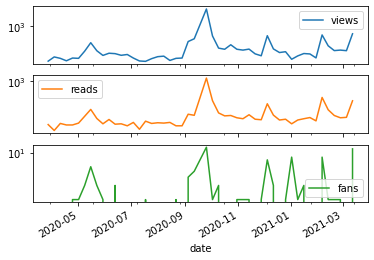

In [165]:
main_stats = pd.concat([get_stats_from_message(m) for m in mailbox.mbox('Takeout/E-mail/MediumStats.mbox')])
main_stats.plot(subplots=True, logy=True)

In [160]:
main_stats['fans'].sum()

87

In [178]:
import re

match = re.search('Views so far\r\n(\d+)', bla)
if match:
    print(match.group(1))

280


In [177]:
messages = list(mailbox.mbox('Takeout/E-mail/MediumStats.mbox'))
get_stats_from_message(messages[2])
#get_total_fans()
bla = get_mail_body(messages[len(messages)-16])
bla

'Your weekly writer summary for March 12, 2021\r\nYour stories on Medium\r\n>From March 5 to March 12, 2021, your stories received:\r\n573 (https://medium.com/me/stats?source=3Demail-256545883c97-1615511622211-=\r\nwriter_stats)\r\n\r\nViews\r\n213 (https://medium.com/me/stats?source=3Demail-256545883c97-1615511622211-=\r\nwriter_stats)\r\n\r\nReads\r\n12 (https://medium.com/me/stats?source=3Demail-256545883c97-1615511622211-w=\r\nriter_stats)\r\n\r\nFans\r\n\r\nAn AI agent plays tic-tac-toe (part 1): building the opponent to play again=\r\nst (https://medium.com/me/stats/post/bb5af74fded1?source=3Demail-256545883c=\r\n97-1615511622211-writer_stats)\r\n\r\nViews so far\r\n280 (https://medium.com/me/stats/post/bb5af74fded1?source=3Demail-256545883=\r\nc97-1615511622211-writer_stats)\r\n\r\nApplause from\r\n\r\nAn AI agent plays tic-tac-toe (part 2): speeding up recursive functions usi=\r\nng memoization (https://medium.com/me/stats/post/97253529aea8?source=3Demai=\r\nl-256545883c97-1615

In [ ]:
bla

In [113]:
int('3'.replace('k', '00').replace('.', ''))

3

In [99]:
'Fan' in get_mail_body(messages[0]).split('\r\n')

True

In [38]:
split_body = body.split('\r\n')
split_body

['Your weekly writer summary for May 29, 2020',
 'Your stories on Medium',
 '>From May 22 to May 29, 2020, your stories received:',
 '110 (https://medium.com/me/stats?source=3Demail-256545883c97-1590717323513-=',
 'writer_stats)',
 '',
 'Views',
 '34 (https://medium.com/me/stats?source=3Demail-256545883c97-1590717323513-w=',
 'riter_stats)',
 '',
 'Reads',
 '1 (https://medium.com/me/stats?source=3Demail-256545883c97-1590717323513-wr=',
 'iter_stats)',
 '',
 'Fan',
 '',
 '',
 'Altair plot deconstruction: visualizing the correlation structure of weathe=',
 'r data (https://medium.com/me/stats/post/38fb5668c5b1?source=3Demail-256545=',
 '883c97-1590717323513-writer_stats)',
 '',
 'Views this week',
 '+68 (https://medium.com/me/stats/post/38fb5668c5b1?source=3Demail-256545883=',
 'c97-1590717323513-writer_stats)',
 '',
 '',
 '',
 'Advanced functional programming for data science: building code architectur=',
 'es with function=E2=80=A6 (https://medium.com/me/stats/post/dd989cc3b0da?so=',
 